# MakeoverMonday EDA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#change directory and import dataset
os.chdir('D:\\MakeoverMondayDataFiles')
data=pd.read_csv('data.csv',encoding='latin1')
data.head()

,Name,TwitterHandle,Date,TweetUrl,Text,Location,TimeZone,Language,VizPic,Latitude,Longitude
0,Andrew Garfinkel,agarfinkel215,2018-03-23 23:48:05,https://t.co/fC900payF1,#MakeoverMonday Wk 12 'UK Pet Population in 20...,NaN,NaN,in,http://pbs.twimg.com/media/DZAtfAbXkAASrab.jpg,NaN,NaN
1,Simon Beaumont,SimonBeaumont04,2018-03-23 10:18:25,https://t.co/aro9UmokbN,My #TableauFF this week is @LouiseJHeath thank...,"Portsmouth, England",NaN,en,NaN,50.803683,-1.075614
2,KJ Kim,akjkim,2018-03-23 08:02:15,https://t.co/jEJhUBE0FM,Ever thought about participating in #MakeoverM...,Singapore,Pacific Time (US & Canada),en,NaN,1.290475,103.852036
3,Pratik,katuvani,2018-03-23 06:52:55,https://t.co/HXsu5yMMjt,"UK: More Houses with Pets. ""week 12"". @VizWizB...",NaN,NaN,en,NaN,NaN,NaN
4,Regis Oconnor,RegisOconnor,2018-03-23 03:01:21,https://t.co/khm7K2RvLZ,Fish are Tops in the UK #MakeoverMonday #Power...,NaN,NaN,en,NaN,NaN,NaN


In [16]:
#get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 11 columns):
Name             2722 non-null object
TwitterHandle    2722 non-null object
Date             2722 non-null datetime64[ns]
TweetUrl         2722 non-null object
Text             2722 non-null object
Location         2179 non-null object
TimeZone         1816 non-null object
Language         2722 non-null object
VizPic           470 non-null object
Latitude         2162 non-null float64
Longitude        2162 non-null float64
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 234.0+ KB


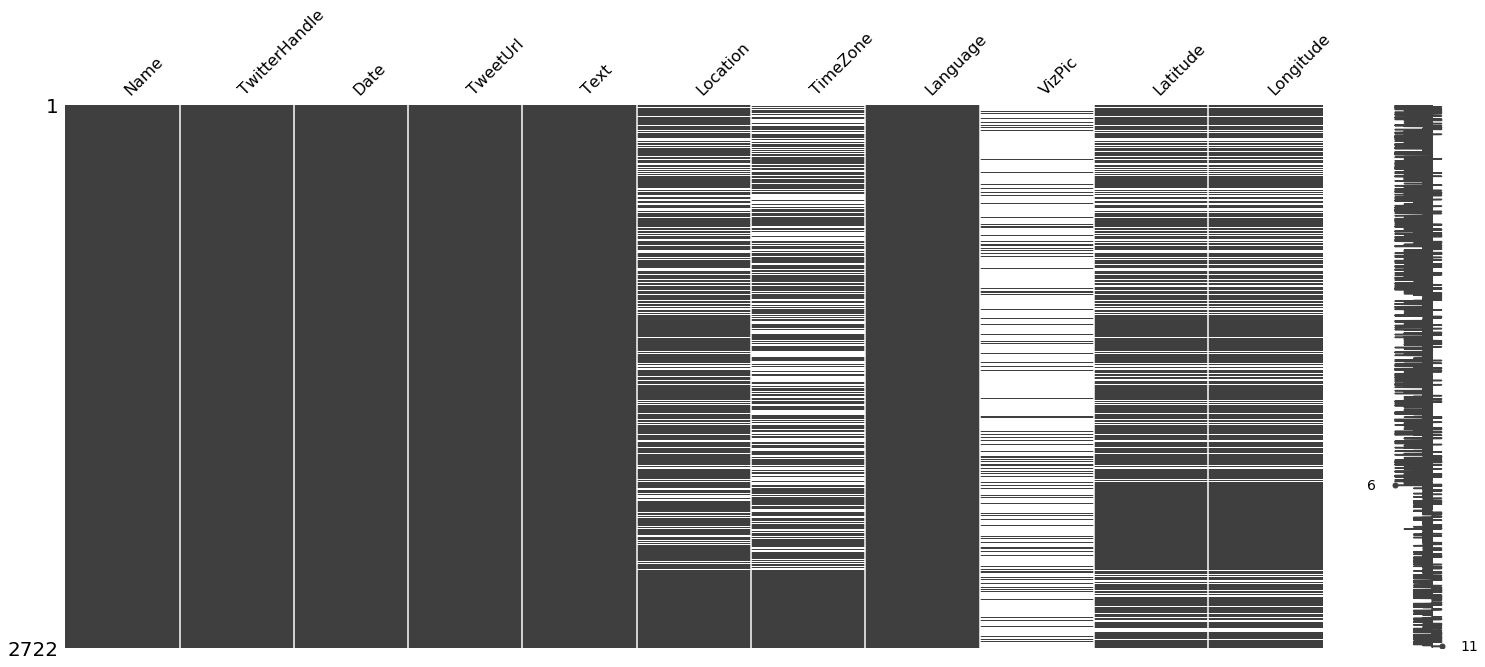

In [4]:
#check the nulls visually
msno.matrix(data)

A lot of nulls in VizPic since twitter doesn't pic up non jpg files. Nulls in time zone and location since not every participant provides that info. Curious as to why the lat/long non null totals are less than the non null total for location.

In [18]:
#see first entry when we started pulling data
data.iloc[-1,:]

Name                                                  datadotworld
TwitterHandle                                         datadotworld
Date                                           2017-12-30 15:10:00
TweetUrl                                   https://t.co/G14zNHactO
Text             Each week, #MakeoverMonday posts a link to a c...
Location                                                Austin, TX
TimeZone                                Central Time (US & Canada)
Language                                                        en
VizPic                                                         NaN
Latitude                                                   30.2711
Longitude                                                 -97.7437
Name: 2721, dtype: object

So the first entry was from data.world which is currently where Eva and Andy host the data sets. This means that I did not clean out the data entirely. Gotta filter out.

In [20]:
#total number of entries from data.world
Data_dot_world_entries=data[data.Name=='datadotworld'].shape[0]
print('total entries of data.world: {}'.format(Data_dot_world_entries))

total entries of data.world: 16


So I need to filter these out

In [23]:
#filtering out data.world entries, update csv, and check totals
data=data[data.Name!='datadotworld']
data.to_csv('data.csv',index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706 entries, 0 to 2720
Data columns (total 11 columns):
Name             2706 non-null object
TwitterHandle    2706 non-null object
Date             2706 non-null datetime64[ns]
TweetUrl         2706 non-null object
Text             2706 non-null object
Location         2163 non-null object
TimeZone         1800 non-null object
Language         2706 non-null object
VizPic           470 non-null object
Latitude         2146 non-null float64
Longitude        2146 non-null float64
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 253.7+ KB


In [24]:
#check the last entry again
data.iloc[-1,:]

Name                                               Simona Loffredo
TwitterHandle                                      simonaloffredo2
Date                                           2017-12-30 15:40:00
TweetUrl                                   https://t.co/7K2w87fxkQ
Text             Quickly finishing a couple of #makeovermonday ...
Location                                    City of London, London
TimeZone                                Pacific Time (US & Canada)
Language                                                        en
VizPic                                                         NaN
Latitude                                                   51.5119
Longitude                                               -0.0780174
Name: 2720, dtype: object

Ok, now let's check out the number of unique participants from the end of 2017 to now (3/25/18)

In [25]:
len(data.Name.unique())

716

Not sure if this may be a little high.... This is over about 3 months. At this point we are on week 12. We should check to see how many people participated more than once and those that only participated once so far.

In [8]:
#Participant frequency of once vs more than once.
post_freq=data.Name.value_counts(ascending=False)

In [42]:
#Create ecdf function
def ecdf(data):
    xs=sorted(data)
    ys=np.arange(1,len(data)+1)/len(data)
    return xs,ys

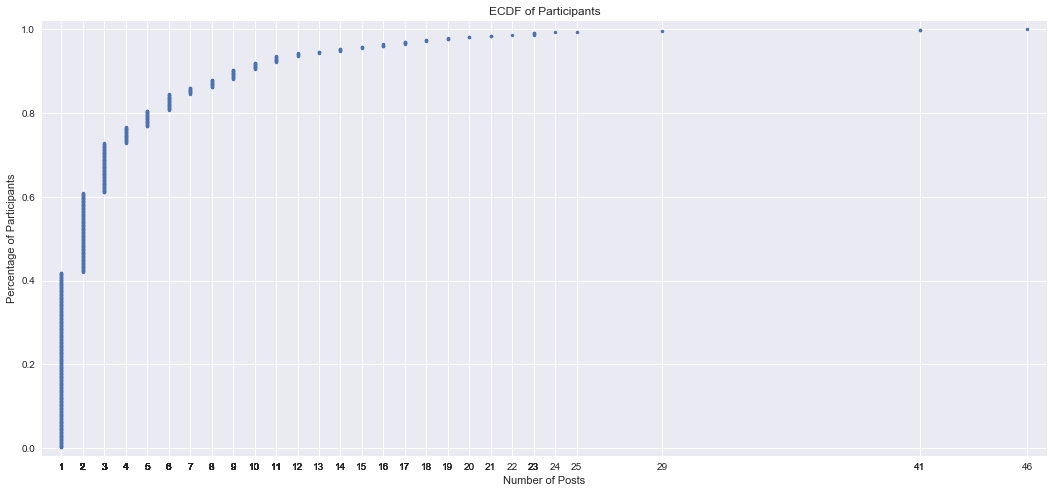

In [55]:
#check ecdf for percentage difference
xs,ys=ecdf(post_freq)
plt.figure(figsize=(18,8))
plt.plot(xs,ys, marker='.',linestyle='none')
plt.margins(0.02)
plt.xticks(xs)
plt.title('ECDF of Participants')
plt.xlabel('Number of Posts')
plt.ylabel('Percentage of Participants')
plt.show()

Ok, so we have:
1. a little over 40% of participants posted once
2. About 80% participants poseted 4 times or less.
3. About 90% participants posted 12 times (perhaps once a week since we have done 12 weeks thus far)
4. We also have a few outliers (46,41,29) These need to be investigated.

In [74]:
outliers=(post_freq>25)
outliers[:5]

Rodrigo Calloni     True
Sarah Bartlett      True
Simon Beaumont      True
Mark Bradbourne     True
Tushar More        False
Name: Name, dtype: bool

So 4 people have posted have posted more than 25 times. Perhaps I need to investigate the collected data further. Assuming they posted once for entry then again for feedback they should have posted a maximum of 24 times at this point. Maybe there were replies that got caught. But that shouldn't be since I set the api search to exclude replies. Or it may be other posts where they use the hashtag along with pics.

In [26]:
post_totals=sorted(post_freq.unique().tolist())
post_totals

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 29,
 41,
 46]

In [39]:
#Reloading data on 3/25/18 in first two cells and post_freq
#Now to get a list of the indexes (aka names of 'participants')
participants_grouped=[]
for total in post_totals:
    participants_grouped.append(post_freq[post_freq==total].index.tolist())

In [40]:
participants_grouped

[['Nicole Hawkins',
  'Edith',
  'zoverlvx',
  'Sushmita',
  'briangillet',
  'Dr. Catrise Austin',
  'glen rabie',
  'ConsultantsClub',
  'peter',
  'Drew',
  'David Velleca',
  'Mike Daddona?',
  'Datavis Tech',
  'Korompai István',
  'UC Fitness Apparel',
  'Phillip A. Raywood',
  'Angela Teller',
  'Jambesh',
  'Xixi Dai',
  'Data Notes',
  'TransMedia Group',
  'Dr. Kim LIVE',
  'Toan Hoang',
  'Matt Clements',
  'Sebastián  Soto Vera',
  'Minhaz Kazi',
  'Elaine Lam',
  'Paul Albert',
  'Ben Davis',
  'Lea Pica',
  'Disha Goel',
  'federico lusi',
  'SkunkyBeer',
  'Lucas Sproule',
  'Seraj alam',
  'Matt Chambers ?',
  'Sean R Anderson',
  'Aleksandar Djakovic',
  'Gabriel Vorbeck',
  'Datasaurus-Rex',
  'Jeremy Blaney',
  'Washington Dentistry',
  'Allison Montgomery',
  'anitha',
  'Swetketu Trivedi',
  'Michael Sanville',
  'Jeremy Parulian',
  'Guillermo',
  'Man in brown',
  'Bogdan Micu',
  'AthenianRazak',
  'Melly Mel',
  'Chipo',
  'Joseph Poltorak',
  'Gayan Peiris',
 

In [44]:
for i in range(len(participants_grouped)):
    print('Number of people that posted {}: {}'.format(post_totals[i],len(participants_grouped[i])))

Number of people that posted 1: 300
Number of people that posted 2: 136
Number of people that posted 3: 85
Number of people that posted 4: 28
Number of people that posted 5: 28
Number of people that posted 6: 28
Number of people that posted 7: 11
Number of people that posted 8: 14
Number of people that posted 9: 17
Number of people that posted 10: 12
Number of people that posted 11: 11
Number of people that posted 12: 5
Number of people that posted 13: 3
Number of people that posted 14: 5
Number of people that posted 15: 3
Number of people that posted 16: 4
Number of people that posted 17: 5
Number of people that posted 18: 3
Number of people that posted 19: 3
Number of people that posted 20: 2
Number of people that posted 21: 2
Number of people that posted 22: 1
Number of people that posted 23: 4
Number of people that posted 24: 1
Number of people that posted 25: 1
Number of people that posted 29: 1
Number of people that posted 41: 2
Number of people that posted 46: 1


My guess is that most of the fake posts may be from the participants that only posted once or twice. I will used the Tweettokenizer from nltk to help investigate if the hashtag makeovermonday was used.

In [45]:
#import modules and libraries to parse tweet text
import re
import nltk
from nltk.tokenize import TweetTokenizer

In [84]:
#create instance of tweettokenizer and then tokenize the tweets from the data.csv
twtoken=TweetTokenizer()
data['TextTokenized']=data['Text'].apply(twtoken.tokenize)
data.head()

,Name,TwitterHandle,Date,TweetUrl,Text,Location,TimeZone,Language,VizPic,Latitude,Longitude,TextTokenized
0,Andrew Garfinkel,agarfinkel215,2018-03-23 23:48:05,https://t.co/fC900payF1,#MakeoverMonday Wk 12 'UK Pet Population in 20...,NaN,NaN,in,http://pbs.twimg.com/media/DZAtfAbXkAASrab.jpg,NaN,NaN,"[#MakeoverMonday, Wk, 12, ', UK, Pet, Populati..."
1,Simon Beaumont,SimonBeaumont04,2018-03-23 10:18:25,https://t.co/aro9UmokbN,My #TableauFF this week is @LouiseJHeath thank...,"Portsmouth, England",NaN,en,NaN,50.803683,-1.075614,"[My, #TableauFF, this, week, is, @LouiseJHeath..."
2,KJ Kim,akjkim,2018-03-23 08:02:15,https://t.co/jEJhUBE0FM,Ever thought about participating in #MakeoverM...,Singapore,Pacific Time (US & Canada),en,NaN,1.290475,103.852036,"[Ever, thought, about, participating, in, #Mak..."
3,Pratik,katuvani,2018-03-23 06:52:55,https://t.co/HXsu5yMMjt,"UK: More Houses with Pets. ""week 12"". @VizWizB...",NaN,NaN,en,NaN,NaN,NaN,"[UK, :, More, Houses, with, Pets, ., "", week, ..."
4,Regis Oconnor,RegisOconnor,2018-03-23 03:01:21,https://t.co/khm7K2RvLZ,Fish are Tops in the UK #MakeoverMonday #Power...,NaN,NaN,en,NaN,NaN,NaN,"[Fish, are, Tops, in, the, UK, #MakeoverMonday..."


In [92]:
#filtering for Rodrigo Calloni since makeovermonday participants were asked to put the week in their tweet to label their 
#participation for that week.
rodrigo=data[data.Name=='Rodrigo Calloni'][data.Text.str.contains(r'week\s+\d')==True]
rodrigo

,Name,TwitterHandle,Date,TweetUrl,Text,Location,TimeZone,Language,VizPic,Latitude,Longitude,TextTokenized
125,Rodrigo Calloni,tableauing,2018-03-18 18:26:07,https://t.co/zpmsJckzW7,now for real... #makeovermonday year 3 week 12...,"Washington, DC",NaN,en,http://pbs.twimg.com/media/DYlz0EgVoAEpISX.jpg,38.894955,-77.036646,"[now, for, real, ..., #makeovermonday, year, 3..."
129,Rodrigo Calloni,tableauing,2018-03-18 17:18:52,https://t.co/DDxJnWmeBp,#makeovermonday year 3 week 12 \r\r\n\r\r\nJus...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, year, 3, week, 12, Just, an,..."
576,Rodrigo Calloni,tableauing,2018-02-26 04:45:06,https://t.co/WabKtFHGqE,#makeovermonday year 3 week 9\r\r\r\r\r\n\r\r\...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, year, 3, week, 9, THE, ECONO..."
838,Rodrigo Calloni,tableauing,2018-02-14 03:48:57,https://t.co/R2rvVP8WfX,acting on @TriMyData feedback here is my reviz...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[acting, on, @TriMyData, feedback, here, is, m..."
1102,Rodrigo Calloni,tableauing,2018-02-05 21:15:46,https://t.co/2HhUUAY0Jp,#makeovermonday year 3 week 6\r\r\r\r\r\r\r\r\...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, year, 3, week, 6, TAKE, ME, ..."
1410,Rodrigo Calloni,tableauing,2018-01-29 05:01:00,https://t.co/59ERtW2sAH,#makeovermonday week 5 year 3\r\r\r\r\r\r\r\r\...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, week, 5, year, 3, Why, is, S..."
1562,Rodrigo Calloni,tableauing,2018-01-22 03:32:00,https://t.co/Qz7P7g2oZ0,#makeovermonday year 3 week 4\r\r\r\r\r\r\r\r\...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, year, 3, week, 4, FLY, ,, TU..."
1579,Rodrigo Calloni,tableauing,2018-01-21 03:46:00,https://t.co/uAMWU9BcF5,#makeovermonday legacy year 1 week 7\r\r\r\r\r...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, legacy, year, 1, week, 7, BI..."
1669,Rodrigo Calloni,tableauing,2018-01-22 03:32:00,https://t.co/Qz7P7g2oZ0,#makeovermonday year 3 week 4\r\r\r\r\r\r\r\r\...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, year, 3, week, 4, FLY, ,, TU..."
1690,Rodrigo Calloni,tableauing,2018-01-21 03:46:00,https://t.co/uAMWU9BcF5,#makeovermonday legacy year 1 week 7\r\r\r\r\r...,"Washington, DC",NaN,en,NaN,38.894955,-77.036646,"[#makeovermonday, legacy, year, 1, week, 7, BI..."


In [93]:
#get number of entries
rodrigo.shape[0]

18

In [94]:
#see text
rodrigo['Text']

125     now for real... #makeovermonday year 3 week 12...
129     #makeovermonday year 3 week 12 \r\r\n\r\r\nJus...
576     #makeovermonday year 3 week 9\r\r\r\r\r\n\r\r\...
838     acting on @TriMyData feedback here is my reviz...
1102    #makeovermonday year 3 week 6\r\r\r\r\r\r\r\r\...
1410    #makeovermonday week 5 year 3\r\r\r\r\r\r\r\r\...
1562    #makeovermonday year 3 week 4\r\r\r\r\r\r\r\r\...
1579    #makeovermonday legacy year 1 week 7\r\r\r\r\r...
1669    #makeovermonday year 3 week 4\r\r\r\r\r\r\r\r\...
1690    #makeovermonday legacy year 1 week 7\r\r\r\r\r...
1721    finally happy with #makeovermonday year 3 week...
1743    #makeovermonday year 3 week 3\r\r\r\r\r\r\r\r\...
2196    legacy #makeovermonday year 1 week 6\r\r\r\r\r...
2324    another legacy #makeovermonday year 1 week 5\r...
2440    another legacy #makeovermonday year 1 week 5\r...
2476    #makeovermonday year 1 week 4\r\r\r\r\r\r\r\r\...
2522    #MakeoverMonday  week 3 year 1\r\r\r\r\r\r\r\r...
2630    #makeo

Searching for the week and the following number for Rodrigo yielded 18 tweets. There are a mix of 2018's and previous years. He also labels the year in a similar format. Based on the entries above, perhaps he did not participate in every week. It does show he has multiple entries for certain weeks such as weeks 3 and 4. These are likely the revisions from the feedback given by Andy and Eva. A more direct message shows this at entry 838.